In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv(r'stock_index_price.csv')
with pd.option_context('display.max_rows', 6): display(df)


,interest_rate,unemployment_rate,stock_index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
...,...,...,...
21,1.75,6.2,822
22,1.75,6.2,704
23,1.75,6.1,719


In [ ]:
# Training Set
x = df[['interest_rate','unemployment_rate']]
x1 = df['interest_rate']
x2 = df['unemployment_rate']
y = df['stock_index_price']


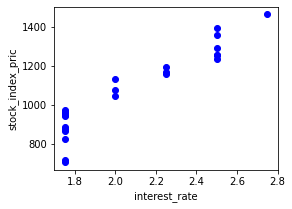

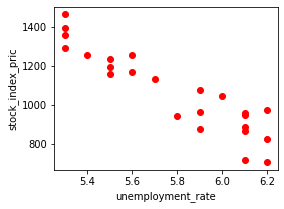

,interest_rate,unemployment_rate,stock_index_price
interest_rate,1.00,-0.93,0.94
unemployment_rate,-0.93,1.00,-0.92
stock_index_price,0.94,-0.92,1.00


In [ ]:
# Test for Correlation

plt.figure(figsize=(4, 3))
plt.scatter(x1, y, c='b')
plt.xlabel('interest_rate')
plt.ylabel('stock_index_pric')
plt.show()

plt.figure(figsize=(4, 3))
plt.scatter(x2, y, c='r')
plt.xlabel('unemployment_rate')
plt.ylabel('stock_index_pric')
plt.show()

display(df.corr().round(2))

print()



In [ ]:
# Split Training & Testting datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Fit model on Training Dataset
model = LinearRegression()
model.fit(x_train, y_train)

# Accuarcy Score on Testing Dataset
score = model.score(x_test, y_test)
print('R-Squared:', '{:.2f}'.format(score))


# Error Score
y_predict = model.predict(x)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)

print('MSE(Mean_Squared_Error):', '{:.2f}'.format(mse))
print('RMSE(Root_Mean_Squared_Error):', '{:.2f}'.format(rmse))

# 
ic = '{:.2f}'.format(model.intercept_)
interest_rate = '{:.4f}'.format(model.coef_[0])
umemployment_rate = '{:.4f}'.format(model.coef_[1])
print(f'The prediction equation is stock_index_price = {ic} + ({interest_rate})x1 + ({umemployment_rate})x2')


R-Squared: 0.83
MSE(Mean_Squared_Error): 4624.98
RMSE(Root_Mean_Squared_Error): 68.01
The prediction equation is stock_index_price = 1149.70 + (394.5217)x1 + (-155.3606)x2


In [ ]:
#Predict Stock Price when interest_rate: 2, umemployment_rate: 5
#and interest_rate: 2.2, umemployment_rate: 5.7
x_predict = [[2, 5], [2.2, 5.7]]
y_predict = model.predict((x_predict))

for (i, x_p) in enumerate(x_predict):
    p = '{:,.0f}'.format(y_predict[i])
    print(f'interest_rate: {x_p[0]}, umemployment_rate: {x_p[1]}, stock price = {p}')

interest_rate: 2, umemployment_rate: 5, stock price = 1,162
interest_rate: 2.2, umemployment_rate: 5.7, stock price = 1,132


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
